In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
df1 = pd.read_csv('app_record.csv')
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [5]:
df2 = pd.read_csv('credit_record.csv')
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [25]:
df = pd.merge(df1, df2, on='ID', how='inner')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [26]:
df.shape

(777715, 20)

In [29]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

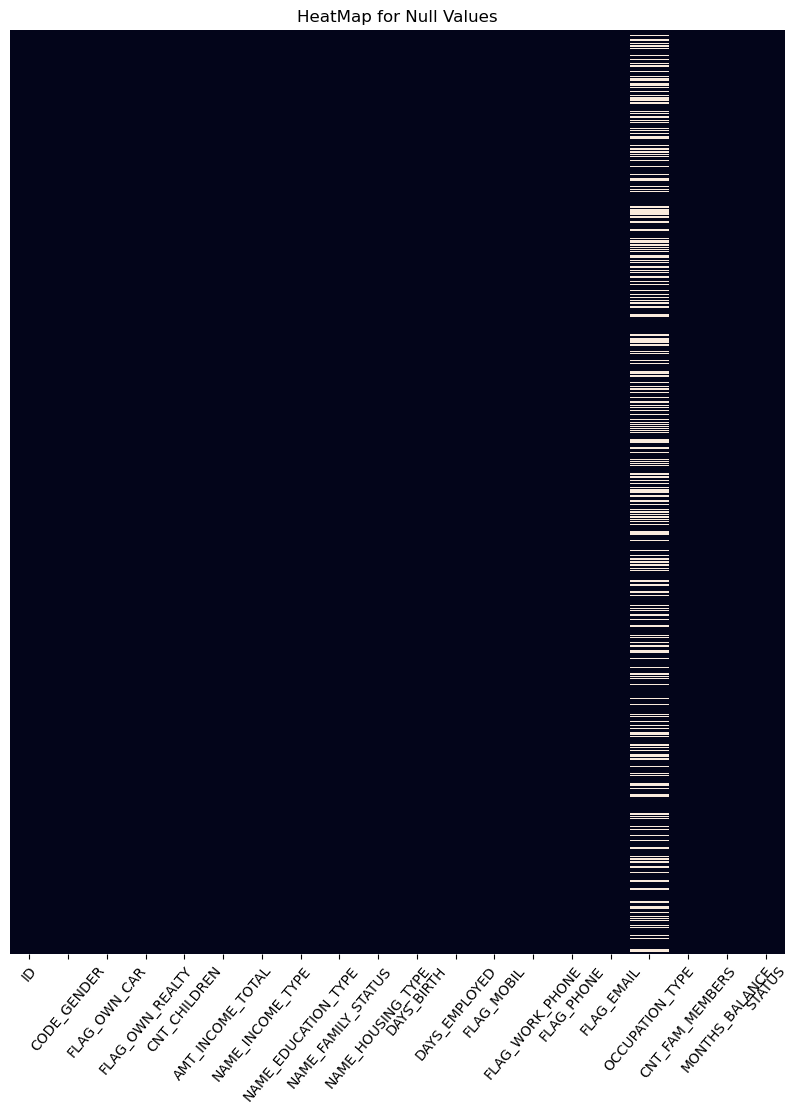

In [31]:
plt.figure(figsize=(10,12))
sns.heatmap(df.isna(), cbar=False , yticklabels=False)
plt.xticks(rotation=50)
plt.title('HeatMap for Null Values')
plt.show()

In [32]:
df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [34]:
df.duplicated().any()

False

In [36]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [37]:
df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'},
    inplace=True)


In [38]:
df.head()

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C


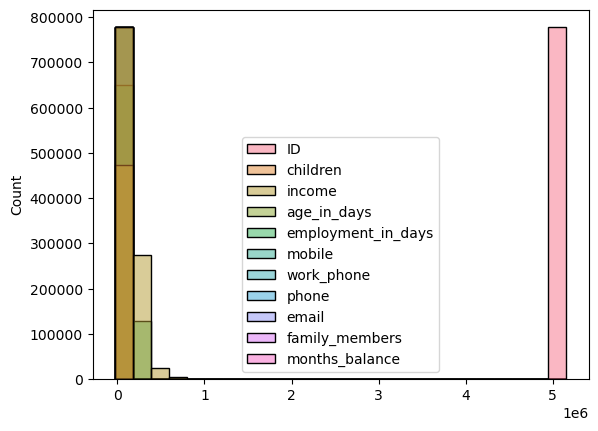

In [40]:
sns.histplot(df, bins=25)
plt.show()

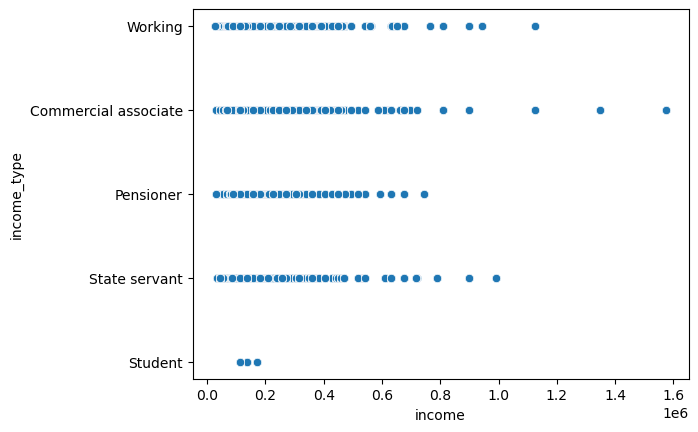

In [42]:
sns.scatterplot(data = df, x=df['income'], y=df['income_type'])
plt.show()

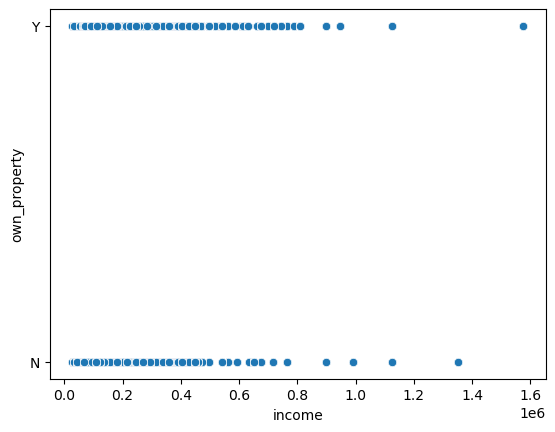

In [43]:
sns.scatterplot(data=df, x=df['income'], y=df['own_property'])
plt.show()

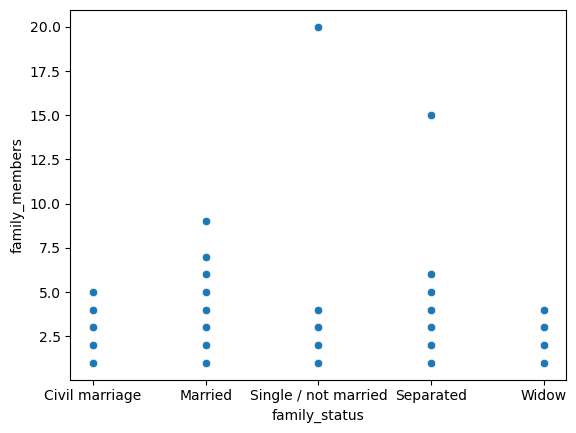

In [44]:
sns.scatterplot(data=df, x=df['family_status'], y=df['family_members'])
plt.show()

<Axes: xlabel='employment_in_days', ylabel='Count'>

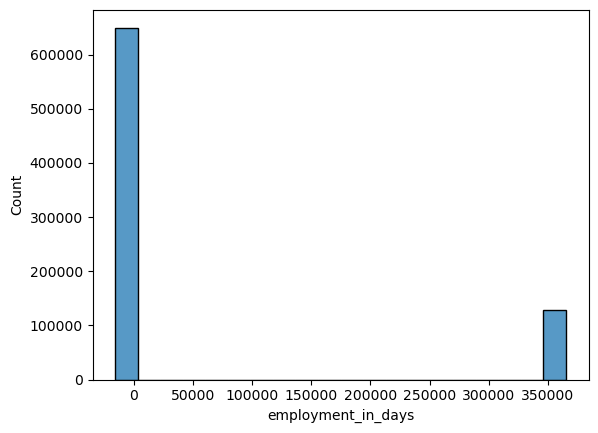

In [45]:
sns.histplot(df['employment_in_days'],bins=20)


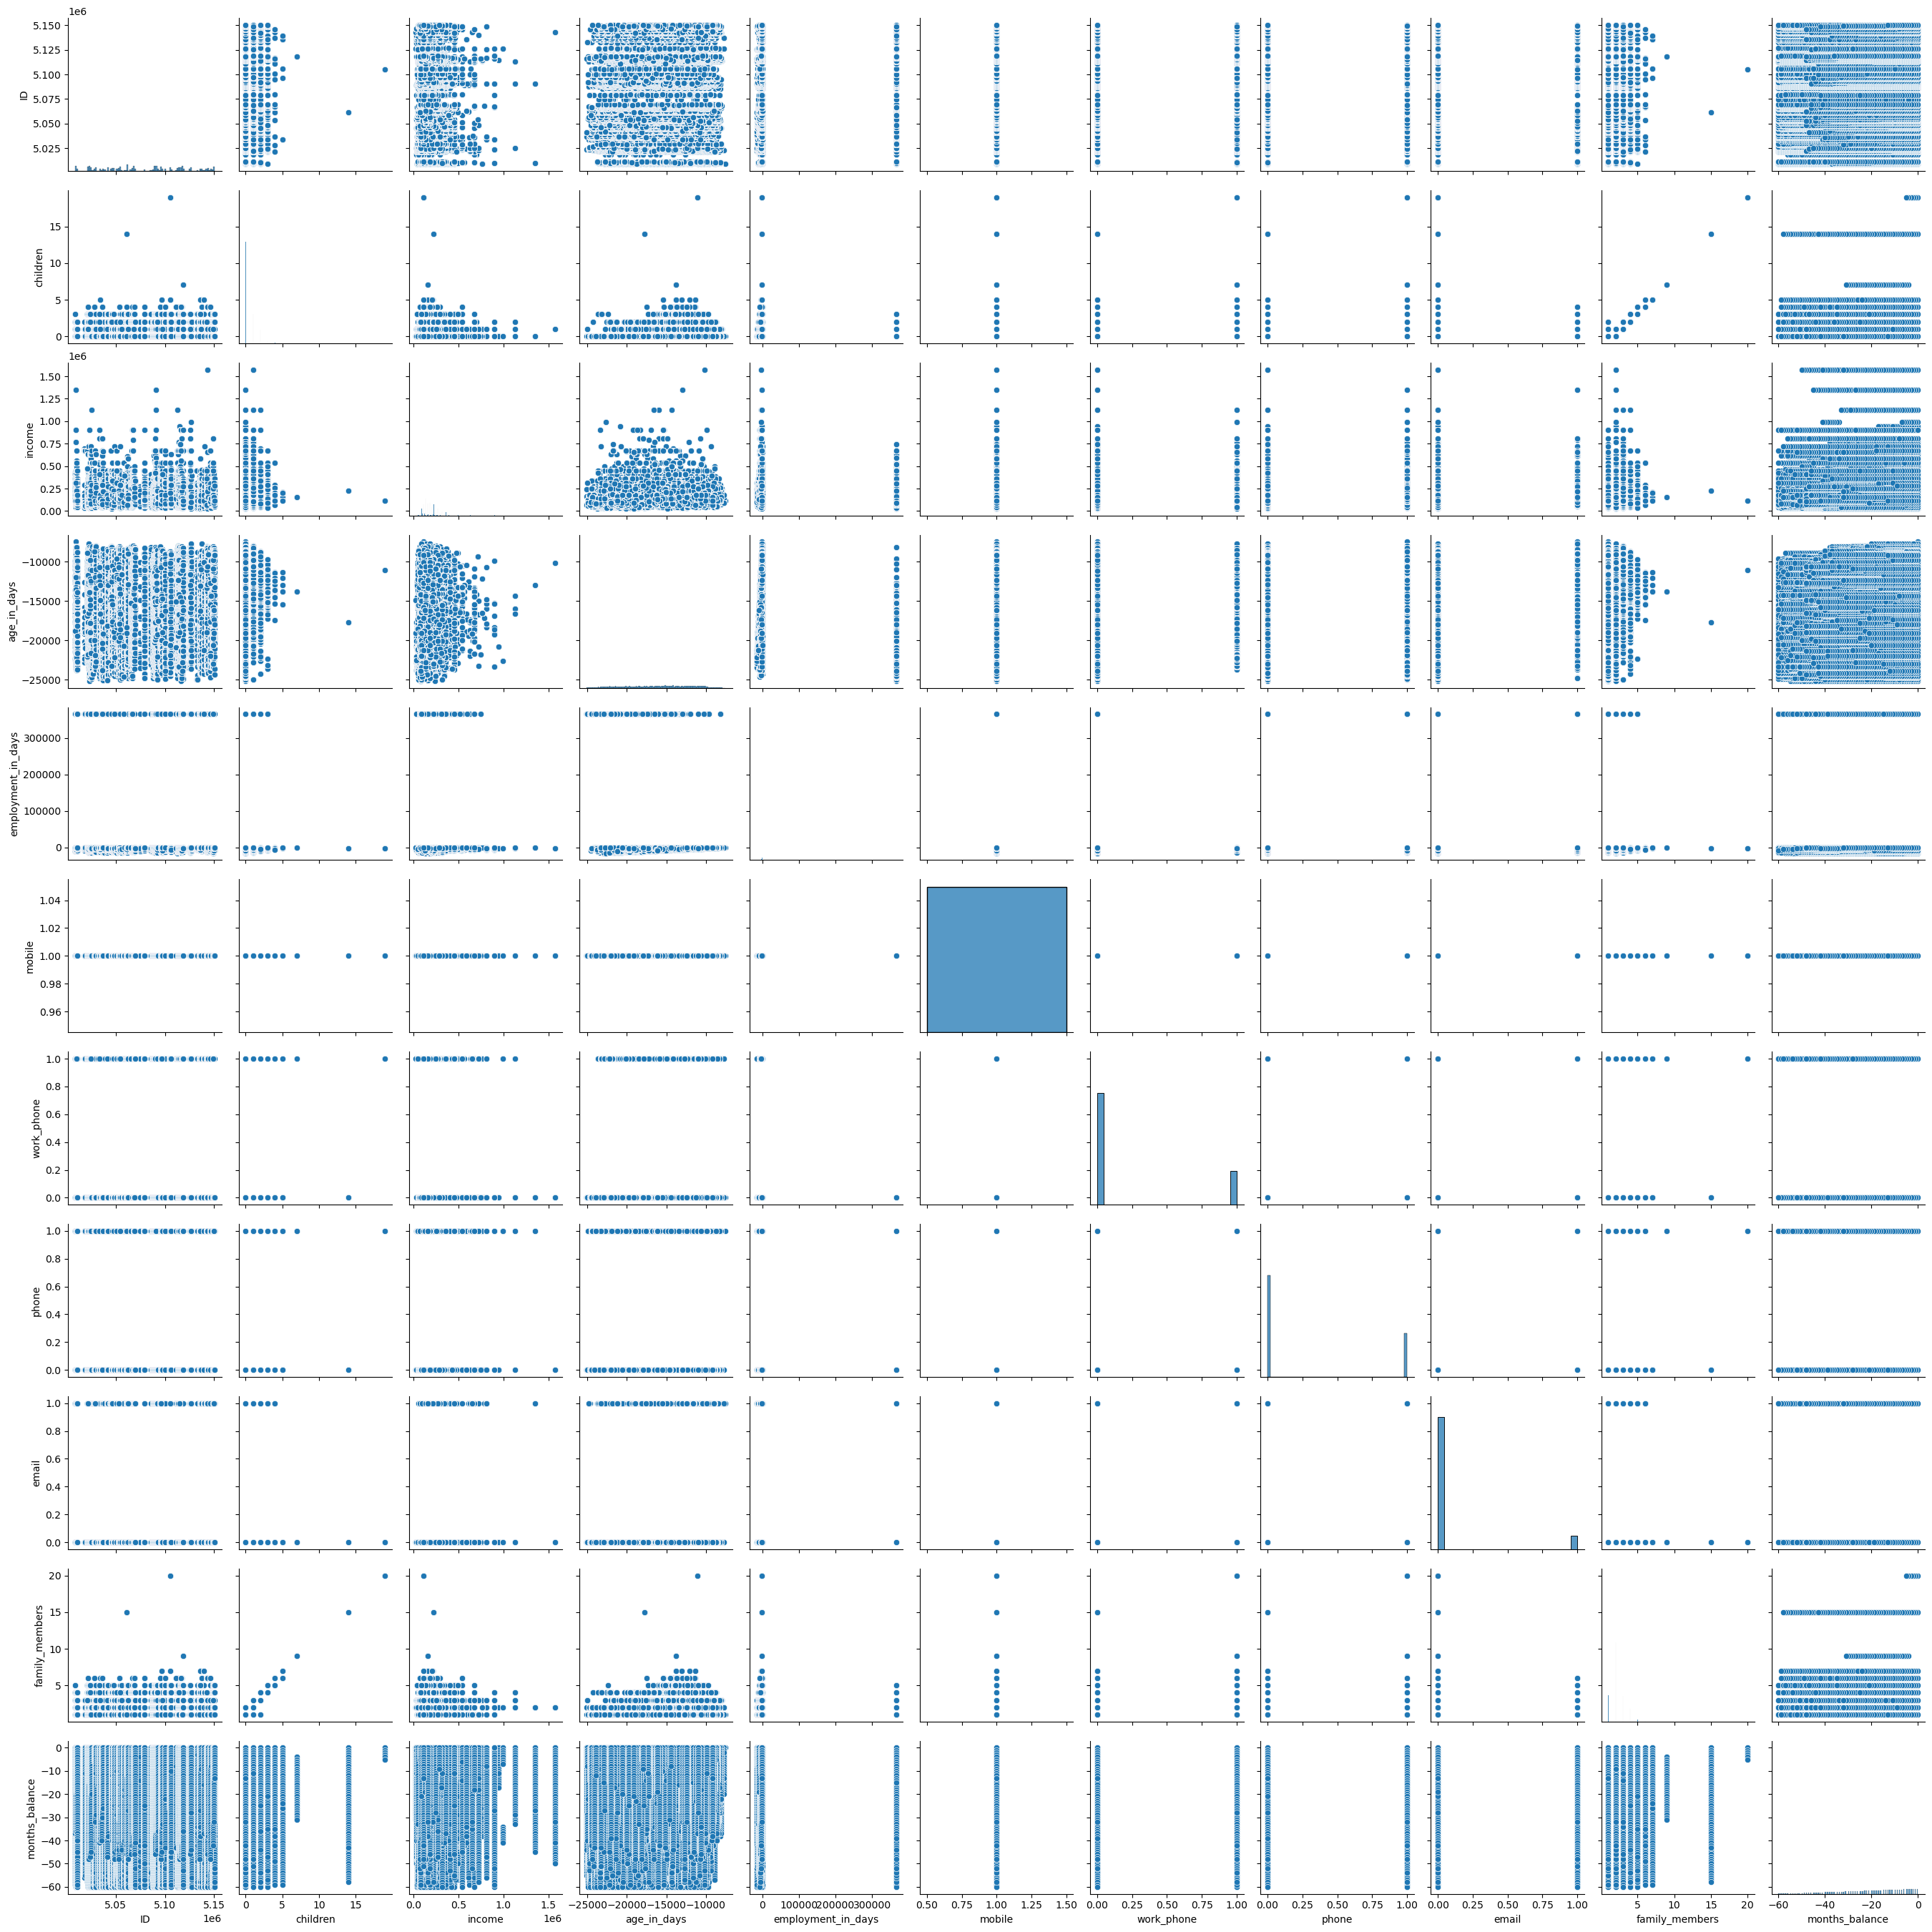

In [48]:
sns.pairplot(df)
plt.show()


In [49]:
df['status'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: status, dtype: int64

In [50]:
df['loan_status'] = df['status'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'good' , 'X' : 'no_loan'})

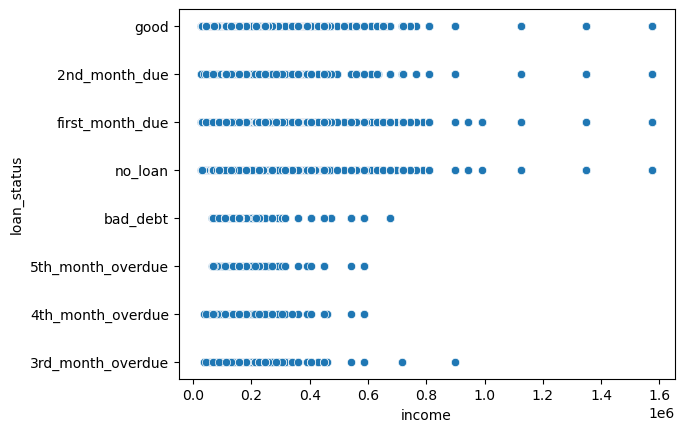

In [51]:
sns.scatterplot(data=df, x=df['income'], y=df['loan_status'])
plt.show()

In [52]:
lab_enc = LabelEncoder()

In [53]:
col = ['gender', 'own_car', 'own_property', 'income_type','education', 'family_status', 'housing_type', 'status','loan_status']

for i in col:
    df[i] = lab_enc.fit_transform(df[i])
df.head()
    
    

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,6,6
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-1,6,6
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-2,6,6
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-3,6,6
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-4,6,6


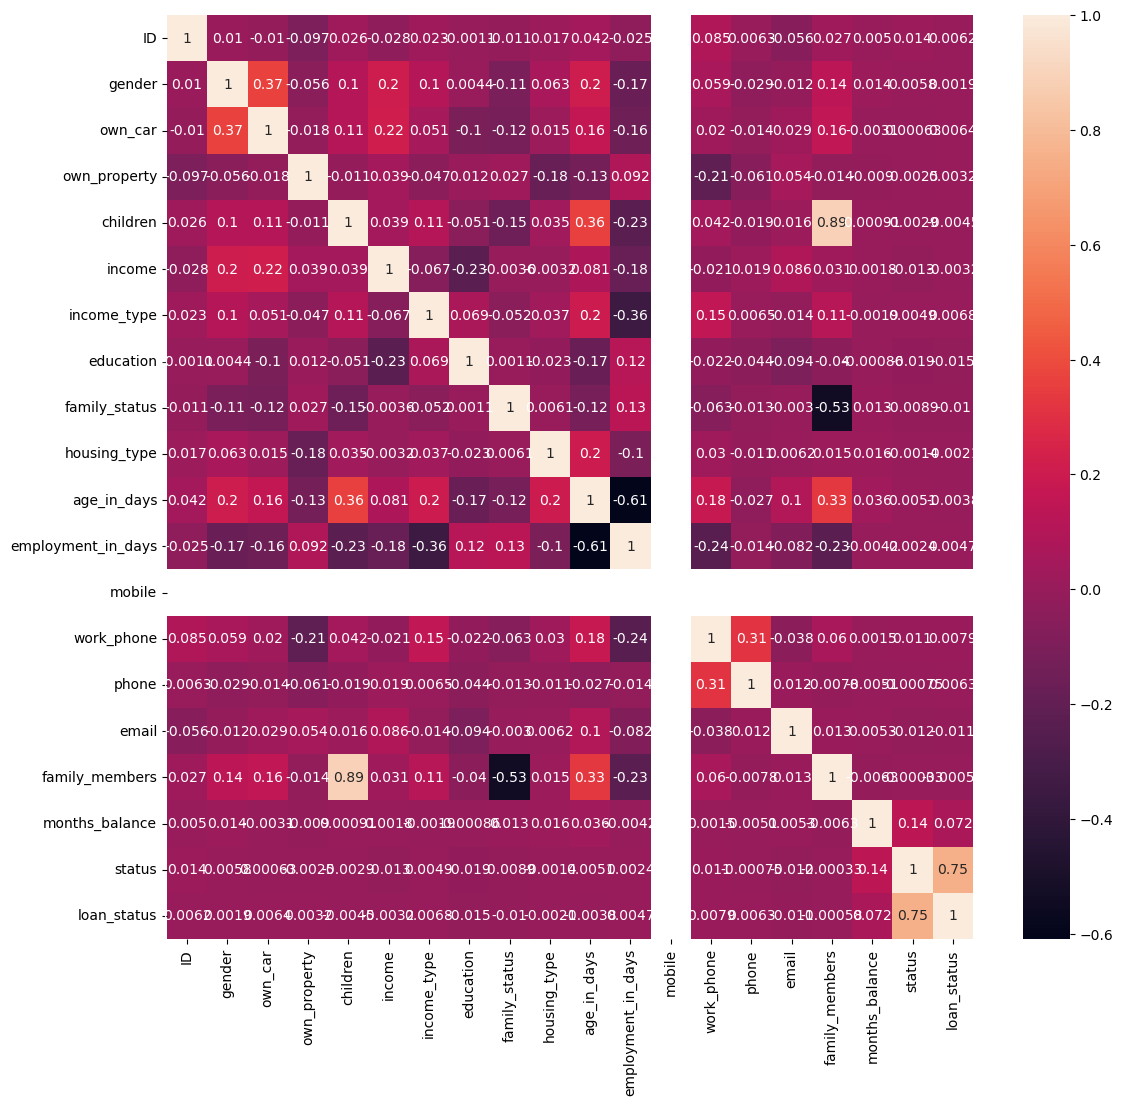

In [54]:
plt.figure(figsize=(13,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [55]:
std_scaler = StandardScaler()

In [56]:
df_scaled = pd.DataFrame(std_scaler.fit_transform(df),columns=df.columns)
df_scaled.head()

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,-1.673005,1.415747,1.247095,0.718448,-0.574026,2.351502,0.925968,-1.545874,-1.445547,2.954976,1.00381,-0.456636,0.0,1.820367,-0.656158,-0.317691,-0.230155,1.375748,0.688946,0.273524
1,-1.673005,1.415747,1.247095,0.718448,-0.574026,2.351502,0.925968,-1.545874,-1.445547,2.954976,1.00381,-0.456636,0.0,1.820367,-0.656158,-0.317691,-0.230155,1.304737,0.688946,0.273524
2,-1.673005,1.415747,1.247095,0.718448,-0.574026,2.351502,0.925968,-1.545874,-1.445547,2.954976,1.00381,-0.456636,0.0,1.820367,-0.656158,-0.317691,-0.230155,1.233725,0.688946,0.273524
3,-1.673005,1.415747,1.247095,0.718448,-0.574026,2.351502,0.925968,-1.545874,-1.445547,2.954976,1.00381,-0.456636,0.0,1.820367,-0.656158,-0.317691,-0.230155,1.162714,0.688946,0.273524
4,-1.673005,1.415747,1.247095,0.718448,-0.574026,2.351502,0.925968,-1.545874,-1.445547,2.954976,1.00381,-0.456636,0.0,1.820367,-0.656158,-0.317691,-0.230155,1.091702,0.688946,0.273524


In [57]:
x = df.drop(['loan_status','status','children','family_members','mobile'], axis = 1) 
y = df['loan_status']


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state= 42)


In [60]:
model = RandomForestClassifier(n_estimators=50,criterion='gini')

In [70]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [71]:
y_pre = model.predict(x_test)

In [72]:
accuracy_score(y_test, y_pre)

0.8874316939890711

In [74]:
print(classification_report(y_test,y_pre))


              precision    recall  f1-score   support

           0       0.35      0.33      0.34       184
           1       0.14      0.12      0.13        16
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.93      0.78      0.85        36
           5       0.85      0.88      0.87      5797
           6       0.96      0.96      0.96      6611
           7       0.83      0.79      0.81      2908

    accuracy                           0.89     15555
   macro avg       0.51      0.48      0.49     15555
weighted avg       0.89      0.89      0.89     15555

